In [1]:
import zipfile
import os
zip_path = '/content/archive.zip'
extract_to = '/content/Dataset'
os.makedirs(extract_to, exist_ok=True)
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

    print("Extraction complete!")

Extraction complete!


#Import Necessary Libraries for Data Analysis.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df= pd.read_csv(r'/content/Dataset/dataset.csv')
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,65,1,1,1,2,2,1,2,2,2,2,2,2,1,NO
1,F,55,1,2,2,1,1,2,2,2,1,1,1,2,2,NO
2,F,78,2,2,1,1,1,2,1,2,1,1,2,1,1,YES
3,M,60,2,1,1,1,2,1,2,1,1,2,1,2,2,YES
4,F,80,1,1,2,1,1,2,1,2,1,1,1,1,2,NO


In [4]:
print(df.isna().sum())

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC_DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL_CONSUMING        0
COUGHING                 0
SHORTNESS_OF_BREATH      0
SWALLOWING_DIFFICULTY    0
CHEST_PAIN               0
LUNG_CANCER              0
dtype: int64


In [5]:
df.isnull().sum()

,0
GENDER,0
AGE,0
SMOKING,0
YELLOW_FINGERS,0
ANXIETY,0
PEER_PRESSURE,0
CHRONIC_DISEASE,0
FATIGUE,0
ALLERGY,0
WHEEZING,0


#The pie chart shows an almost equal distribution of lung cancer cases between males and females.


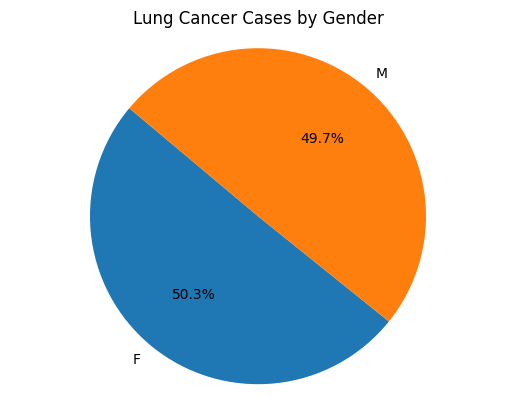

In [6]:
counts = df[df['LUNG_CANCER'] == 'YES']['GENDER'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Lung Cancer Cases by Gender')
plt.axis('equal')
plt.show()

#The bar chart illustrates the distribution of lung cancer cases across different age groups.

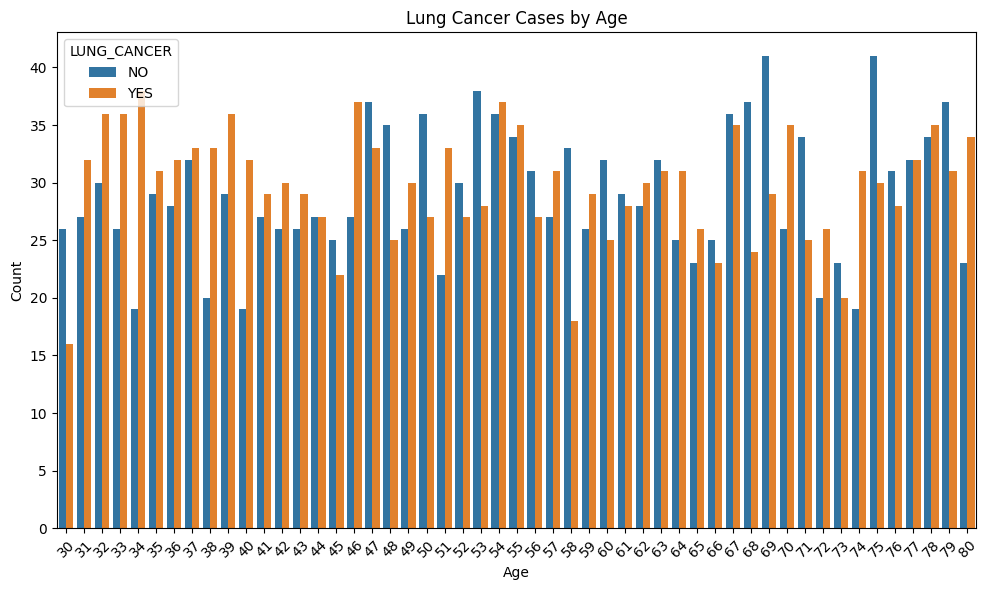

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='AGE', hue='LUNG_CANCER')
plt.title('Lung Cancer Cases by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,55.169000,1.491000,1.514000,1.494000,1.499000,1.509667,1.489667,1.506667,1.497333,1.491333,1.510667,1.488000,1.489667,1.498667
std,14.723746,0.500002,0.499887,0.500047,0.500082,0.499990,0.499977,0.500039,0.500076,0.500008,0.499970,0.499939,0.499977,0.500082
min,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,42.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,55.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000
75%,68.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,80.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


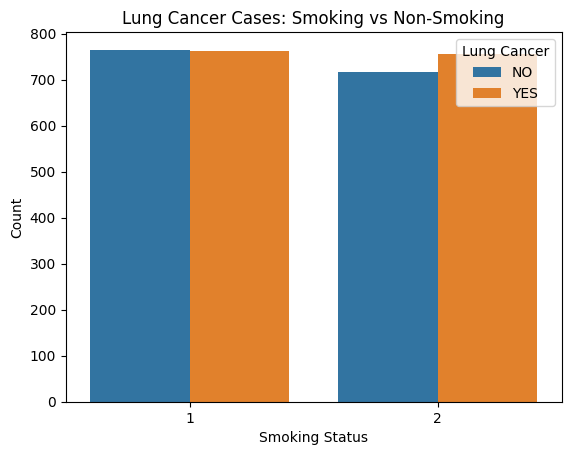

In [14]:
sns.countplot(data=df, x='SMOKING', hue='LUNG_CANCER')
plt.title('Lung Cancer Cases: Smoking vs Non-Smoking')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.legend(title='Lung Cancer')

plt.show()

In [17]:
cancer_patients = df[df['LUNG_CANCER'] == 'YES']
smoking_counts = cancer_patients['SMOKING'].value_counts(normalize=True) * 100
print(smoking_counts)

SMOKING
1    50.197628
2    49.802372
Name: proportion, dtype: float64


#This shows somehow the non smokers also get cancer with only slight less chance lol

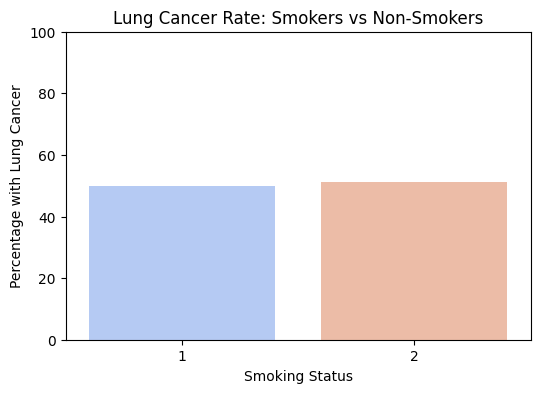

In [20]:
cancer_rate = df.groupby('SMOKING')['LUNG_CANCER'].value_counts(normalize=True).unstack()['YES'] * 100
plt.figure(figsize=(6, 4))
sns.barplot(x=cancer_rate.index, y=cancer_rate.values, palette='coolwarm')
plt.title('Lung Cancer Rate: Smokers vs Non-Smokers')
plt.xlabel('Smoking Status')
plt.ylabel('Percentage with Lung Cancer')
plt.ylim(0, 100)
plt.show()

#Comparing lung cancer rates for people based on:

Smoking status: Smoker / Non-smoker

Alcohol consumption: Yes / No


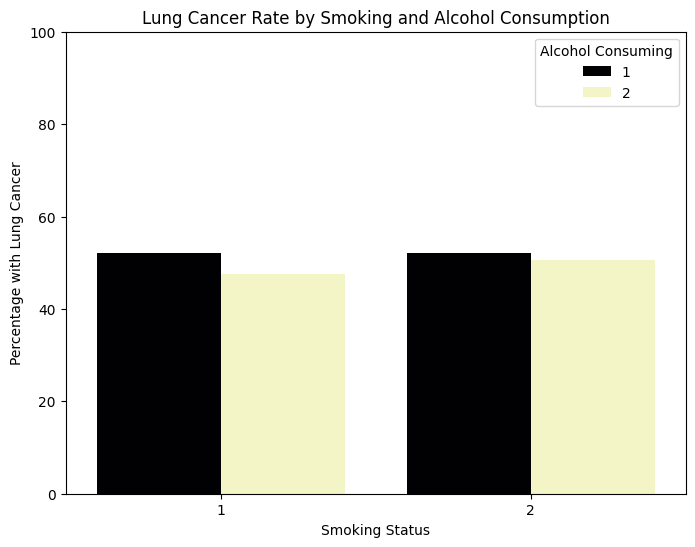

In [22]:
grouped = df.groupby(['SMOKING', 'ALCOHOL_CONSUMING'])['LUNG_CANCER'].value_counts(normalize=True).unstack()['YES'] * 100
grouped = grouped.reset_index().rename(columns={ 'YES': 'Cancer_Rate' })
plt.figure(figsize=(8, 6))
sns.barplot(data=grouped, x='SMOKING', y='Cancer_Rate', hue='ALCOHOL_CONSUMING', palette='magma')
plt.title('Lung Cancer Rate by Smoking and Alcohol Consumption')
plt.xlabel('Smoking Status')
plt.ylabel('Percentage with Lung Cancer')
plt.ylim(0, 100)
plt.legend(title='Alcohol Consuming')
plt.show()

#Lung Cancer Rate by Swallowing Difficulty & Shortness of Breath
It seems it does not matter much for this dataset

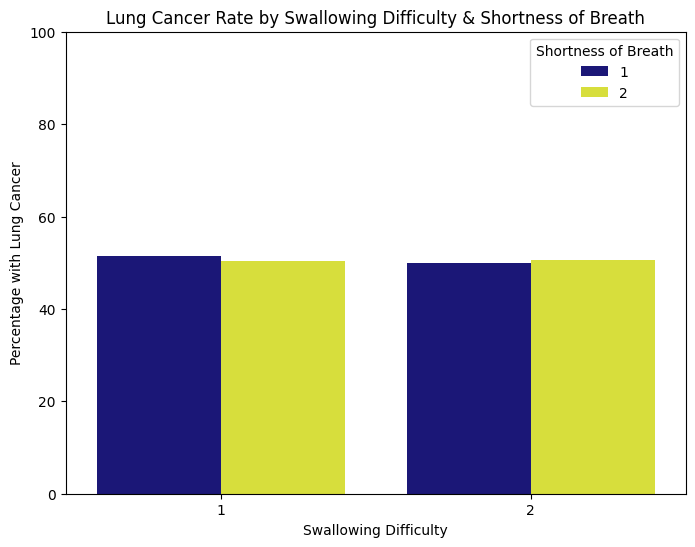

In [23]:
grouped = df.groupby(['SWALLOWING_DIFFICULTY', 'SHORTNESS_OF_BREATH'])['LUNG_CANCER'].value_counts(normalize=True).unstack()['YES'] * 100
grouped = grouped.reset_index().rename(columns={'YES': 'Cancer_Rate'})
plt.figure(figsize=(8, 6))
sns.barplot(data=grouped,x='SWALLOWING_DIFFICULTY',y='Cancer_Rate',hue='SHORTNESS_OF_BREATH',palette='plasma')
plt.title('Lung Cancer Rate by Swallowing Difficulty & Shortness of Breath')
plt.xlabel('Swallowing Difficulty')
plt.ylabel('Percentage with Lung Cancer')
plt.ylim(0, 100)
plt.legend(title='Shortness of Breath')
plt.show()

In [29]:
cancer_rate = df.groupby('YELLOW_FINGERS')['LUNG_CANCER'].value_counts(normalize=True).unstack()['YES'] * 100
cancer_rate_df = cancer_rate.reset_index()
cancer_rate_df.columns = ['YELLOW_FINGERS', 'Cancer_Rate']


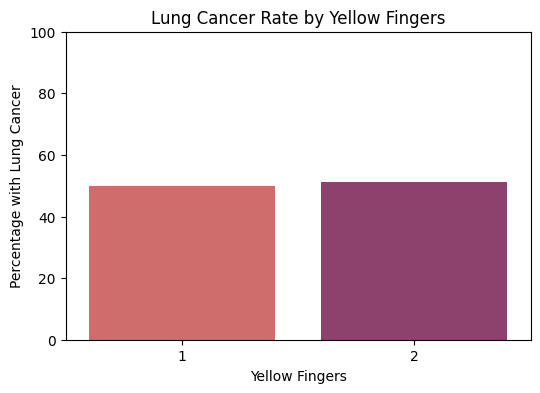

In [30]:
plt.figure(figsize=(6, 4))
sns.barplot(data=cancer_rate_df, x='YELLOW_FINGERS', y='Cancer_Rate', palette='flare')
plt.title('Lung Cancer Rate by Yellow Fingers')
plt.xlabel('Yellow Fingers')
plt.ylabel('Percentage with Lung Cancer')
plt.ylim(0, 100)
plt.show()

#Wrong Dataset for analysis i guess.As its mostly balanced maybe used for model training instead 😓😭

In [32]:
df['LUNG_CANCER'].value_counts()

,count
LUNG_CANCER,
YES,1518
NO,1482
